In [87]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [88]:
df=pd.read_csv("tested.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [89]:
df.shape

(418, 12)

<AxesSubplot:>

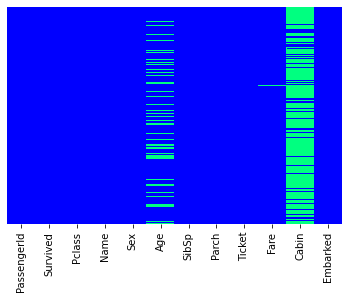

In [90]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap="winter")

In [91]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [92]:
def missing_value(df,df_thres):
    samples=len(df)
    dropped_col=[]
    missing_col={}
    for i in df.columns:
        n_missing=df[i].isnull().sum()
        missing_ratio=n_missing/samples
        
        if missing_ratio>df_thres:
            df=df.drop([i],axis=1)
            dropped_col.append(i)
            
        elif n_missing>0:
            missing_col[i]=[]
            missing_col[i].append((n_missing,missing_ratio))
            
    print("dropped_columns",dropped_col)
    print("Other columns--->")    
    
    for k, v in missing_col.items():
        print(k," ",v)
    return df   
df=missing_value(df,0.4)
before=len(df)
df_c=df.dropna()
after=len(df)
print("dropped percentage is",round(1-(after/before),2)*100, "%")
        

dropped_columns ['Cabin']
Other columns--->
Age   [(86, 0.20574162679425836)]
Fare   [(1, 0.0023923444976076554)]
dropped percentage is 0.0 %


<AxesSubplot:>

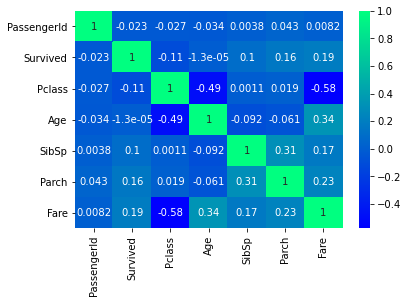

In [93]:
sns.heatmap(df.corr(),annot=True,cmap="winter")

<AxesSubplot:xlabel='Survived', ylabel='count'>

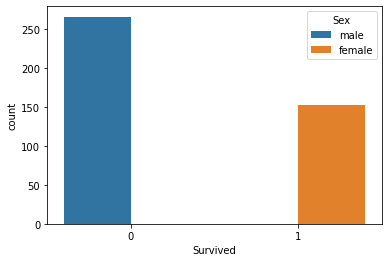

In [94]:
sns.countplot(x="Survived",hue="Sex",data=df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

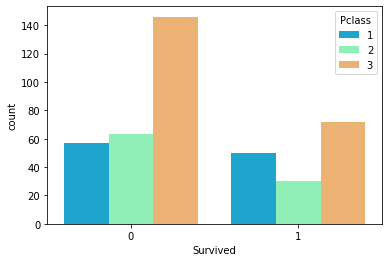

In [95]:
sns.countplot(x="Survived",hue="Pclass",data=df,palette="rainbow")

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age'>

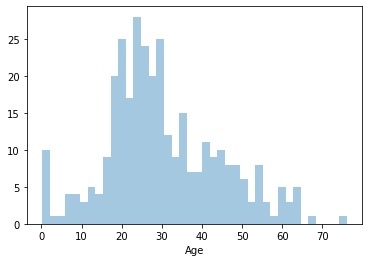

In [96]:
sns.distplot(df["Age"].dropna(),kde=False,bins=40)

<AxesSubplot:>

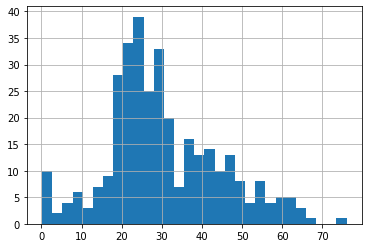

In [97]:
df["Age"].hist(bins=30)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

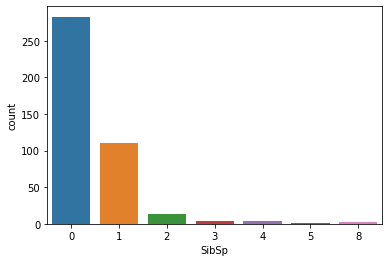

In [98]:
sns.countplot(x="SibSp",data=df)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

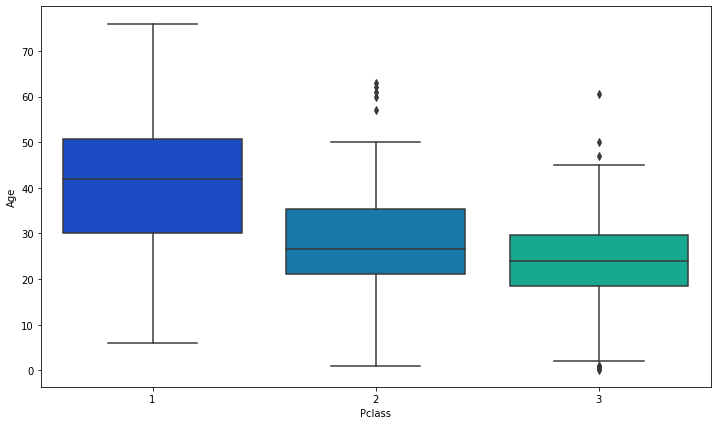

In [99]:
plt.figure(figsize=(12,7))
sns.boxplot(x="Pclass",y="Age",data=df,palette="winter")

In [100]:
def impute_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    
    if pd.isnull(Age):
        
        if Pclass==1:
            return 41
        elif Pclass==2:
            return 27
        elif Pclass==3:
            return 24
        
    else:
        return Age

In [101]:
df["Age"]=df[["Age","Pclass"]].apply(impute_age,axis=1)
df["Fare"]=df["Fare"].mean()


In [102]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [103]:
from sklearn import preprocessing  

In [104]:
le=LabelEncoder()
df["Sex"]=le.fit_transform(df["Sex"])

In [105]:
df["Embarked"].value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

In [109]:
df["Embarked"]=le.fit_transform(df["Embarked"])
df["Embarked"].value_counts()

2    270
0    102
1     46
Name: Embarked, dtype: int64

In [113]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
import sklearn.model_selection as ms

In [125]:
y=df["Survived"]
x=df.drop(["Survived","Name","Ticket"],axis=1)

In [126]:
x_train,x_test,y_train,y_test=ms.train_test_split(x,y,test_size=0.3,random_state=111)

In [127]:
model=LogisticRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [128]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        78
           1       1.00      1.00      1.00        48

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126

